In [1]:
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
import seaborn as sns

In [3]:
#This dataset is CDS (Web + App)
df4 = pd.read_csv(r'D:\CDS CvR sizing4.csv')

In [4]:
df4

,date,mv,aov,session,cvr
0,01-ม.ค.-22,18648340,3225.24,585670,0.0099
1,02-ม.ค.-22,20839549,2941.36,607202,0.0117
2,03-ม.ค.-22,23494702,2834.10,650833,0.0127
3,04-ม.ค.-22,25741442,2739.33,725987,0.0129
4,05-ม.ค.-22,22951120,2768.53,723351,0.0115
...,...,...,...,...,...
228,17-ส.ค.-22,19028335,2839.20,658954,0.0102
229,18-ส.ค.-22,17428580,2745.96,629283,0.0101
230,19-ส.ค.-22,22147709,3611.24,647827,0.0095
231,20-ส.ค.-22,17342724,2976.78,576908,0.0101


In [5]:
df4.dtypes

date        object
mv           int64
aov        float64
session      int64
cvr        float64
dtype: object

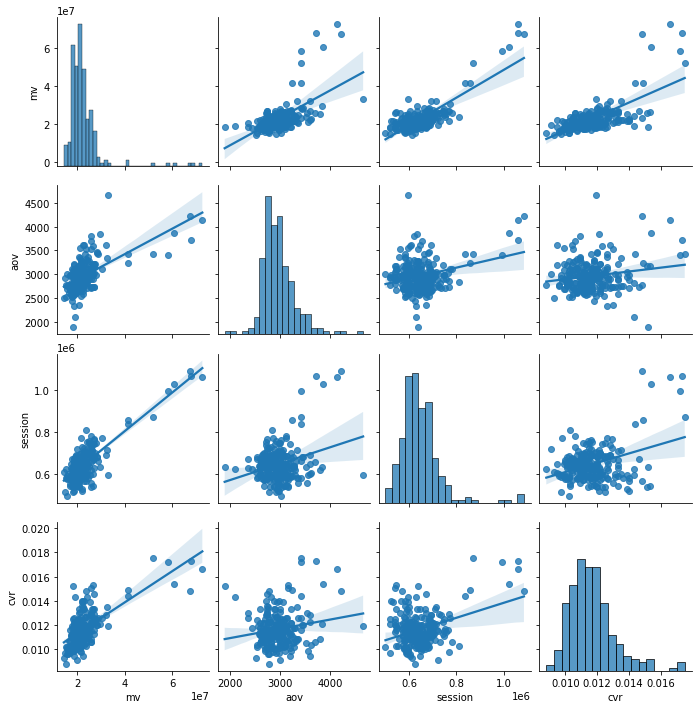

In [6]:
#Multivariate Analysis = check for linear relatinoship between Y and all X variables
sns.pairplot(df4,
            kind = 'reg')

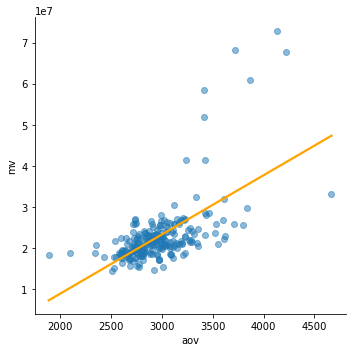

In [7]:
#Univariate Analysis (Deep dive by each independent variables)
sns.lmplot(x = 'aov',
          y = 'mv',
          data = df4,
          ci = None, line_kws = {'color':'orange'},
           scatter_kws = {'alpha':0.5})

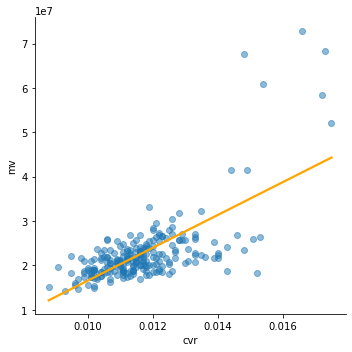

In [8]:
sns.lmplot(x = 'cvr',
          y = 'mv',
          data = df4,
          ci = None, line_kws = {'color':'orange'},
           scatter_kws = {'alpha':0.5})

In [9]:
#Every X has linear relationship with Y, so can build "Linear Regression"

In [10]:
#Calculate corrleation
df4[['mv','aov','session','cvr']].corr()

,mv,aov,session,cvr
mv,1.000000,0.617803,0.814095,0.687713
aov,0.617803,1.000000,0.296501,0.175036
session,0.814095,0.296501,1.000000,0.367557
cvr,0.687713,0.175036,0.367557,1.000000


In [11]:
#Plot Correlation in Heatmap
df4_corr = df4[['mv', 'aov', 'session', 'cvr']].corr()

<AxesSubplot:>

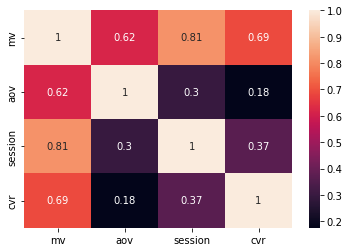

In [12]:
sns.heatmap(df4_corr, annot = True)

In [13]:
#NO correlation among Independent variables, so NO Multicolliearity issue for sure!! Hooray!!

In [14]:
#Build Multiple Regression Model
lm = smf.ols(formula = 'mv ~ aov + session + cvr', data = df4).fit()

In [15]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     2452.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          1.06e-173
Time:                        21:28:32   Log-Likelihood:                -3617.2
No. Observations:                 233   AIC:                             7242.
Df Residuals:                     229   BIC:                             7256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.192e+07   1.03e+06    -60.065      0.0

In [16]:
#Calcalute Revenue difference when increase CvR 0.6%
import sklearn
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model

LinearRegression()

In [18]:
X = df4.drop(columns = ['mv', 'date'])
y = df4['mv']

In [19]:
model.fit(X, y)

LinearRegression()

In [20]:
model.score(X, y)

0.9698071859824182

In [21]:
model.intercept_

-61921425.59178127

In [22]:
model.coef_

array([8.92888196e+03, 4.91278949e+01, 2.25881925e+09])

In [23]:
X.head()

,aov,session,cvr
0,3225.24,585670,0.0099
1,2941.36,607202,0.0117
2,2834.10,650833,0.0127
3,2739.33,725987,0.0129
4,2768.53,723351,0.0115


In [24]:
#Try using Cumulative AOV and Sessions of Jan - July 2022
#With CvR 1.3% + 0.6% VS 1.3%
model.predict([[2630, 63620000, 0.019],
              [2630, 63620000, 0.013]])

array([3.12999578e+09, 3.11644286e+09])

In [25]:
#ถ้าใช้ aov and session ด้วยค่ารวม Jan-July 22 จะได้ว่า 
#"If CvR increase 0.6% (with Session and AOV held constant), MV will increase = 13,552,920 THB
#This comes from taking 3.12999578e+09 - 3.11644286e+09, it will equal 13,552,920

In [26]:
#Just to confirm
#Try using only July 2022 AOV and Session
#With CvR 1.3% + 0.6% VS 1.3% (The same as above scenario)
model.predict([[2580, 9180000, 0.019],
              [2580, 9180000, 0.013]])

array([4.55026731e+08, 4.41473816e+08])

In [27]:
#Take 4.55026731e+08 - 4.41473816e+08, it will also equal 13,552,920
#CONFIRM!! The effcet of 0.6% increase in CvR is 13.6 M THB, if holding AOV and Session constant
#This is for WEB + APP
#For CDS Only!!

In [28]:
#To do tomorrow
#1. do APP only
#2. do othr BU apart from CDS

In [29]:
#Cross check with Nicko's new method
model.predict([[2630, 127756300, 0.0148],
              [2630, 127756300, 0.0088]])

array([6.27139014e+09, 6.25783723e+09])

In [30]:
#Show calculation
#Regression 1
aov = 2630
session = 127756300
cvr = 0.0148
nmv = -61921425.59178127 + 8.92888196*1000 * aov + 4.91278949*10 * session + 2.25881925*1000000000 *cvr
print(nmv)

6271390138.075889


In [31]:
#Regression 2
aov = 2630
session = 127756300
cvr2 = 0.0088
nmv2 = -61921425.59178127 + 8.92888196*1000 * aov + 4.91278949*10 * session + 2.25881925*1000000000 *cvr2
print(nmv2)

6257837222.575889


In [32]:
#Regression 1 - Regression 2
effect_of_increase_cvr = (nmv - nmv2)
print(effect_of_increase_cvr)

13552915.5


In [33]:
#Need to consult with Nicko that the latest method yield weird result

In [34]:
#Import new dataset to include ORDER
#MV = a*Order + b
#a = assume that it is AOV, can do as it's gonna stay constant in 2 formulas anyway

In [35]:
#import newly updated dataset
df = pd.read_csv(r'D:\CvR Sizing for CDS Web+App Combined.xlsx.csv')

In [36]:
df

,date,session,aov,order,cvr,mv
0,01-ม.ค.-65,298863,3130.86,2242.0,0.0075,7019395.60
1,02-ม.ค.-65,294377,2752.40,2591.0,0.0088,7131468.42
2,03-ม.ค.-65,318249,2900.56,2928.0,0.0092,8492827.88
3,04-ม.ค.-65,327836,2937.80,3133.0,0.0096,9204118.15
4,05-ม.ค.-65,320888,2769.94,2835.0,0.0088,7852774.40
...,...,...,...,...,...,...
230,19-ส.ค.-65,253189,2831.60,1809.0,0.0071,5122359.73
231,20-ส.ค.-65,258859,2732.20,1823.0,0.0070,4980807.30
232,21-ส.ค.-65,262491,2623.86,1982.0,0.0076,5200486.74
233,22-ส.ค.-65,270687,3029.55,1970.0,0.0073,5968217.28


In [37]:
df.dtypes

date        object
session      int64
aov        float64
order      float64
cvr        float64
mv         float64
dtype: object

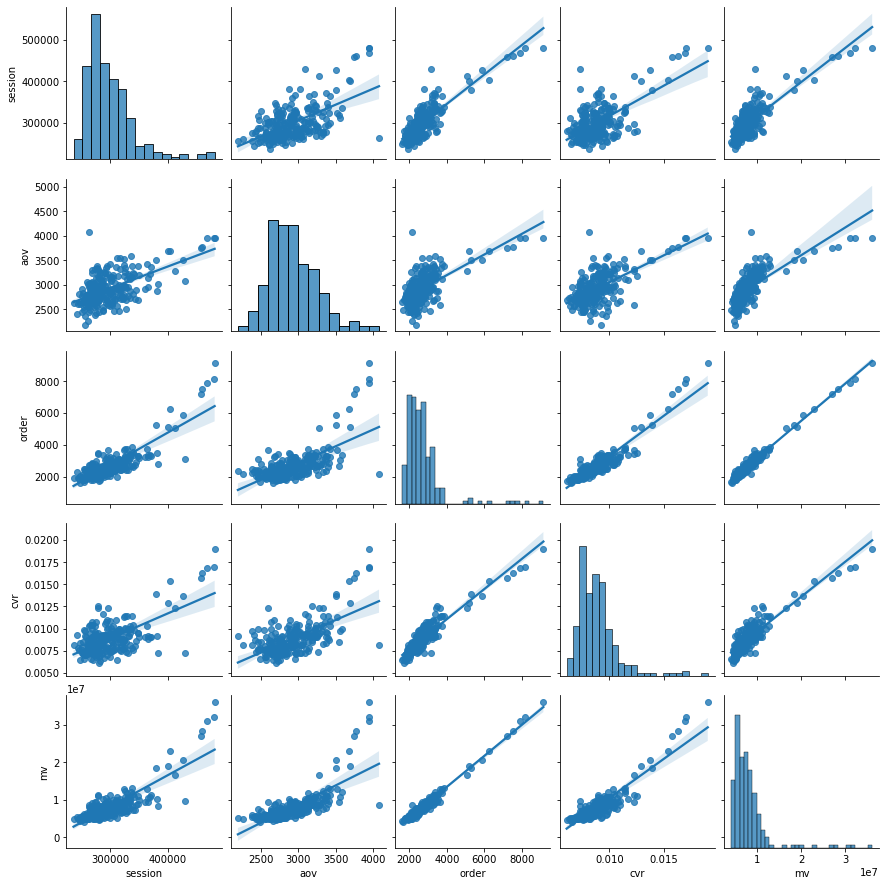

In [38]:
sns.pairplot(df,
            kind = 'reg')

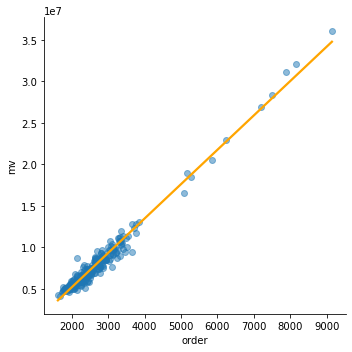

In [39]:
#Deep dive only order and mv
sns.lmplot(x = 'order',
          y = 'mv',
          data = df,
          ci = None, line_kws = {'color':'orange'},
           scatter_kws = {'alpha':0.5})

<AxesSubplot:>

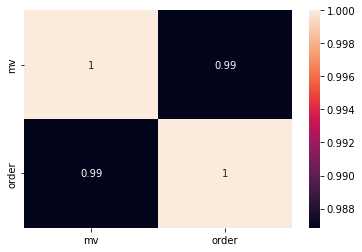

In [40]:
#Correlation
df_corr = df[['mv', 'order']].corr()
sns.heatmap(df_corr, annot = True)

In [41]:
#Single regression model
lm2 = smf.ols(formula = 'mv ~ order', data = df).fit()

In [42]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     8674.
Date:                Wed, 31 Aug 2022   Prob (F-statistic):          2.39e-186
Time:                        21:28:49   Log-Likelihood:                -3493.5
No. Observations:                 235   AIC:                             6991.
Df Residuals:                     233   BIC:                             6998.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.066e+06   1.29e+05    -23.858      0.0

In [43]:
#MV = a*Order + b
#assume that a = coefficient of order = constant AOV and b = error
#order = session * CvR
order_post_cvr = 9183680*0.0148
order_pre_cvr = 9183680*0.0088

mv_post = 4137.9099*order_post_cvr - 3066000
mv_pre = 4137.9099*order_pre_cvr - 3066000

In [44]:
mv_post

559352357.7783936

In [45]:
mv_pre

331344915.43580157

In [46]:
total_impact = mv_post - mv_pre

In [47]:
total_impact
#This is the result after using session and cvr of 1 month (july 2022)

228007442.34259206

In [48]:
#try using and session and cvr of 2022 YTD (Jan-July 2022)
order_post_2 = 63623062*0.015
order_pre_2 = 63623062*0.009

mv_post_2 = 4137.9099*order_post_2 - 3066000
mv_pre_2 = 4137.9099*order_pre_2 - 3066000

total_impact_2 = mv_post_2 - mv_pre_2

In [49]:
print(total_impact_2)

1579598988.7086825


In [50]:
#It yield different result in 2 formulas due to the difference of siz ein the input sessions
#but if use result * 7, it yield almost the same result as 2
#So this means that the revenue uplift from 0.6% increase in CvR is 228M THB per month

In [51]:
#Try inputting sessions = 1
order_post_3 = 1*0.0148
order_pre_3 = 1*0.0088

mv_post_3 = 4137.9099*order_post_3 - 3066000
mv_pre_3 = 4137.9099*order_pre_3 - 3066000

total_impact_3 = mv_post_3 - mv_pre_3

In [52]:
print(total_impact_3)

24.827459400054067


In [53]:
order_post_4 = 1*0.015
order_pre_4 = 1*0.009

mv_post_4 = 4137.9099*order_post_4 - 3066000
mv_pre_4 = 4137.9099*order_pre_4 - 3066000

total_impact_4 = mv_post_4 - mv_pre_4

In [54]:
print(total_impact_4)

24.827459400054067


In [55]:
#formula 3 = formula 4, so this proove this regressio works fine
#So if want regression value by how much, need to input the same unit in sessions and CvR
#ex. want 1 month MV, need to input 1 month session and cvr
#IN SUM, THE REVENUE UPLIFT FROM 0.6% INCREASE IN CVR IS 228M THB PER MONTH
#THIS CONFIRM THAT NICKO'S WAY OF CALCULATION IS CORRECT
#WHAT DOES NOT MAKE SENSE NOW IS THERE UPLIFT AMOUNT, CAN NOT BE AS MUCH AS 0.6%
#AND CAN NOT BE EQUAL ACROSS ALL BU

In [56]:
#to do 1 more check
#change number of session input to be 4137.9099*input_session = real life value of AOV*session
#real life AOV*session = 27014911102
#1 month data = July 2022
#input session = 6528636.861
order_post_5 = 6528636.861*0.0148
order_pre_5 = 6528636.861*0.0088

mv_post_5 = 4137.9099*order_post_5 - 3066000
mv_pre_5 = 4137.9099*order_pre_5 - 3066000
total_impact_5 = mv_post_5 - mv_pre_5

In [57]:
total_impact_5

162089466.60382092

In [58]:
#IN SUM, TOTAL UPLIFT FOR 1 MONTH (JULY 2022) is 162M THB
#% incrase from monthly revenue
percentage_increase = 162089466.60382092/236929967
percentage_increase

0.6841239572021758

In [59]:
#68% increase in monthly revenue for CDS for 0.6% uplift in CvR

In [60]:
order_post_6 = 6528636.861*0.015
order_pre_6 = 6528636.861*0.009

mv_post_6 = 4137.9099*order_post_6 - 3066000
mv_pre_6 = 4137.9099*order_pre_6 - 3066000
total_impact_6 = mv_post_6 - mv_pre_6

In [61]:
total_impact_6

162089466.60382095

In [62]:
#confirm above as regression 5 = regression 6

In [63]:
#Try creating regression model using function
#mv_post_2 = 4137.9099*order_post_2 - 3066000
def reg(x):
    return 4137.9099*x - 3066000

In [64]:
reg(63623062*0.015)

3945931471.7717066

In [65]:
order = 63623062*0.015
reg(order)

3945931471.7717066

In [66]:
#Writing the same function in lambda form
reg_lam = lambda x: 4137.9099*x - 3066000
#think of lambda is anonymous function x that can be put in any operation

In [67]:
reg_lam(order)

3945931471.7717066

In [68]:
reg_lam(63623062*0.015)

3945931471.7717066

In [69]:
#Writing regression function for multiple regression model
#basic def function method
def multireg(x, y, z):
    return -61921425.59178127 + 8.92888196*1000*x + 4.91278949*10*y + 2.25881925*1000000000*z

In [70]:
multireg(2630, 127756300, 0.0148)

6271390138.075889

In [71]:
#Using Lambda to build multiregression formula
multi_lam = lambda x, y, z: -61921425.59178127 + 8.92888196*1000*x + 4.91278949*10*y + 2.25881925*1000000000*z

In [72]:
multi_lam(2630, 127756300, 0.0148)

6271390138.075889

In [73]:
#Combining lambda with if else
#in normal def function
def multiply(x, y):
    if x > y:
        return x*y
    else:
        return x-y

In [74]:
multiply(5,5)

0

In [75]:
multiply(7,5)

35

In [76]:
#lambda is very useful when want to do calculation to your df